In [10]:
def V_SHO_matrix(x_mesh):
    """
    Harmonic oscillator potential matrix (defined as a diagonal matrix)
    """
    k = 1/2       # k is chosen so that hbar*omega = 1 
    V_diag = k * x_mesh**2 / 2  # diagonal matrix elements
    N = len(x_mesh)  # number of x points
    
    return V_diag * np.diag(np.ones(N), 0) 

In [11]:
def xsq_matrix(x_mesh):
    """
    matrix for x^2 operator
    """
    N = len(x_mesh)  # number of x points

    return x_mesh**2 * np.diag(np.ones(N), 0) 

In [12]:
def eikx_matrix(x_mesh, k):
    """
    matrix for e^{ikx} operator
    """
    N = len(x_mesh)  # number of x points

    return np.exp(1j * k * x_mesh) * np.diag(np.ones(N), 0) 

In [13]:
# Combine matrices to make the Hamiltonian matrix
V_SHO = V_SHO_matrix(x_mesh)

Hamiltonian = -second_deriv + V_SHO  

In [14]:
# Try diagonalizing using numpy functions
eigvals, eigvecs = np.linalg.eigh(Hamiltonian)

In [15]:
print(eigvals[0:10])

[0.49999375 1.49996875 2.49991875 3.49984375 4.49974377 5.49961909
 6.49947187 7.49931583 8.49922262 9.49949943]


Notice that they are all *above* the exact answer. Variational principle!

In [16]:
wf_0 = eigvecs[:,0]
wf_1 = eigvecs[:,1]
wf_2 = eigvecs[:,2]

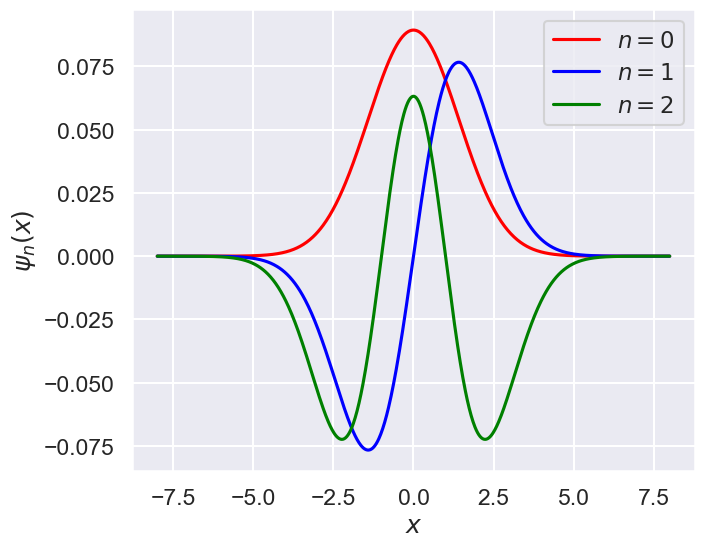

In [18]:
fig_new = plt.figure(figsize=(16,6))

ax1 = fig_new.add_subplot(1,2,1)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$\psi_n(x)$')
#ax1.set_xlim(0, x_max)
#ax1.set_ylim(-1., 3)

ax1.plot(x_mesh, wf_0, color='red', label=r'$n=0$')
ax1.plot(x_mesh, wf_1, color='blue', label=r'$n=1$')
ax1.plot(x_mesh, wf_2, color='green', label=r'$n=2$')

ax1.legend();


In [20]:
wf_0 @ wf_0  # Normalized to 1

1.0

In [21]:
wf_0 @ Hamiltonian @ wf_0  # check that expectation value of H is 0.5

0.49999374992198353

In [22]:
xsq_exp_val = wf_0 @ xsq_matrix(x_mesh) @ wf_0

In [23]:
eikx_exp_val = wf_0 @ eikx_matrix(x_mesh, ktest) @ wf_0

In [26]:
print('  k             <e^{ikx}>          e^{-k^2<x^2>/2}     rel. error ')
for k in np.arange(0, 3.2, .2):
    lhs = wf_0 @ eikx_matrix(x_mesh, k) @ wf_0 
    rhs = np.exp(-k**2 * xsq_exp_val / 2.)
    print(f' {k:.2f}  {lhs:.10f}   {rhs:.10f}      {rel_error(np.real(lhs), rhs):.5e}')

  k             <e^{ikx}>          e^{-k^2<x^2>/2}     rel. error 
 0.00  1.0000000000+0.0000000000j   1.0000000000      0.00000e+00
 0.20  0.9801991650+0.0000000000j   0.9801991634      1.66671e-09
 0.40  0.9231182173+0.0000000000j   0.9231181927      2.66674e-08
 0.60  0.8352740830+0.0000000000j   0.8352739702      1.35004e-07
 0.80  0.7261551562+0.0000000000j   0.7261548464      4.26679e-07
 1.00  0.6065388734+0.0000000000j   0.6065382415      1.04170e-06
 1.20  0.4867620692+0.0000000000j   0.4867610177      2.16006e-06
 1.40  0.3753217962+0.0000000000j   0.3753202943      4.00178e-06
 1.60  0.2780480961+0.0000000000j   0.2780461980      6.82686e-06
 1.80  0.1979088785+0.0000000000j   0.1979067143      1.09353e-05
 2.00  0.1353443061+0.0000000000j   0.1353420503      1.66671e-05
 2.20  0.0889291675+0.0000000000j   0.0889269975      2.44023e-05
 2.40  0.0561407450+0.0000000000j   0.0561388048      3.45609e-05
 2.60  0.0340519529+0.0000000000j   0.0340503319      4.76029e-05
 2.80  0.